# What is Poverty? 
Poverty is not having sufficient resources to enjoy a decent standard of living; be that the lack of access to healthcare, education etc

In economics, there are two kinds of poverty. Absolute vs Relative
Absolute Poverty is is a condition where household income is below a necessary level to maintain basic living standards (food, shelter, housing).

## Relative poverty – A condition where household income is a certain percentage below median incomes. 

## Why is poverty an issue? 
From a moral perspective, having enough to survive is a basic human right. The difference between us now as a civilized society and that of primal times is that the world is managed based on moral concepts of justice, fairness and compassion, rather than survival of the fittest. 

From an economics perspective, poverty has always been associated with social issues such as crime, healthcare and education. We shall further explore this in later parts.

## How best to measure poverty?
The abosolute poverty line can be measured by totaling the cost of basic needs needed to survive. However, I do not believe that we should be contented as a society with the idea that people barely surviving day by day can be considered a living. On the other hand, there is relative poverty as a measurement. Conventionally, relative poverty is taken to be 50% below the median wage. We shall explore if this is a good measure for poverty later.

Alternatively, a good gauge in my opinion to measure poverty in today's society is if one does not have enough to ensure the possbility of social mobility. That would mean not having enough for education and Infocomm Services even if basic needs are met. Singapore is a country built on meritocracy, where opportunities are given to those who have the ability. If one does not even have the opportunity to utilize and cultivate their abilities due to generational poverty, then we have failed as a society.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
MHI_per_member_df = pd.read_csv('Average and Median Monthly Household Income from Work Per Household Member.csv')
MHI_per_member_df = MHI_per_member_df.dropna()
MHI_per_member_df = MHI_per_member_df.set_index(MHI_per_member_df.columns[0])
MHI_per_member_df = MHI_per_member_df.drop(MHI_per_member_df.index[0])

In [3]:
level_1 = ['Resident Households','Resident Employed Households']
level_2 = ['Average', 'Median']
iterables = [level_1, level_2]
index = pd.MultiIndex.from_product(iterables)
index

MultiIndex([(         'Resident Households', 'Average'),
            (         'Resident Households',  'Median'),
            ('Resident Employed Households', 'Average'),
            ('Resident Employed Households',  'Median')],
           )

In [4]:
MHI_per_member_df.columns = index
MHI_per_member_df.index.names = ['Year']
MHI_per_member_df = MHI_per_member_df.replace(",","", regex= True).apply(pd.to_numeric)
MHI_per_member_df

Resident Households        Resident Employed Households       
                 Average Median                      Average Median
Year                                                               
2000                1586   1125                         1735   1236
2001                1792   1250                         1925   1352
2002                1713   1189                         1883   1320
2003                1724   1187                         1909   1335
2004                1727   1183                         1916   1331
2005                1812   1235                         2013   1392
2006                1936   1300                         2127   1447
2007                2136   1399                         2337   1547
2008                2364   1588                         2586   1754
2009                2283   1552                         2524   1735
2010                2425   1638                         2709   1848
2011                2652   1786                         2925   1994
2012                2852   1913                         3142   2127
2013                2902   2023                         3204   2247
2014                3061   2115                         3418   2380
2015                3273   2253                         3624   2500
2016                3289   2287                         3688   2584
2017                3383   2344                         3835   2699
2018                3488   2425                         3969   2792
2019                3571   2500                         4115   2925

Based on the data above, we can see that in the year 2019 the 50th percentile has a monthly income of \$2_500(For resident households. We shall be inclusive of all Singaporeans). We shall now work to estimate the cost per capita for social mobility. 

In [5]:
MHE_per_member_df = pd.read_csv('Average Monthly Household Expenditure Per Household Member.csv')
MHE_per_member_df

,Unnamed: 0,,.1,.2,.3,.4,Dollar
0,Type of Goods and Services,Total,Income Quintile 1/,NaN,NaN,NaN,NaN
1,,,1st - 20th 4/,21st - 40th,41st - 60th,61st - 80th,81st - 100th
2,Total,"1,627.70",942.5,"1,088.30","1,387.10","1,775.40","2,945"
3,Food and Non-Alcoholic Beverages,124.5,114.3,113.2,122,123.5,149.6
4,Alcoholic Beverages and Tobacco,15.6,12.5,16.4,18.3,15.2,15.4
5,Clothing and Footwear,41.4,15.9,26,34,47.2,84.1
6,Housing and Utilities,171.2,109.3,101.8,123.8,179,342.1
7,"Furnishings, Household Equipment and Rout...",87.3,57.7,57.4,69.6,86.6,165.1
8,Health,109.8,97.8,82.5,98.3,109,161.6
9,Transport,247.5,94.4,129.7,200.7,284.8,527.8


In [6]:
level_1 = ['Income Quintile']
level_2 = ['1st - 20th', '21st - 40th','41st - 60th','61st - 80th','81st - 100th']
iterables = [level_1, level_2]
index = pd.MultiIndex.from_product(iterables)
index = index.insert(0, ("",' Type of Goods and Services'))
index = index.insert(1, ("",'Total'))

In [7]:
MHE_per_member_df.columns = index

In [8]:
MHE_per_member_df = MHE_per_member_df.drop(MHE_per_member_df.index[:2])

In [9]:
MHE_per_member_df

\
                           Type of Goods and Services     Total   
2                                              Total   1,627.70   
3                   Food and Non-Alcoholic Beverages      124.5   
4                    Alcoholic Beverages and Tobacco       15.6   
5                              Clothing and Footwear       41.4   
6                              Housing and Utilities      171.2   
7        Furnishings, Household Equipment and Rout...      87.3   
8                                             Health      109.8   
9                                          Transport      247.5   
10                                     Communication       80.9   
11                            Recreation and Culture        130   
12                              Educational Services       87.3   
13                          Food Serving Services 2/      278.7   
14                            Accommodation Services         23   
15               Miscellaneous Goods and Services 3/      225.2   
16                        Non-Assignable Expenditure        5.1   
17       Imputed rentals for owner-occupied accomm...     369.5   
18       Total, including imputed rental of owner-...  1,997.20   

   Income Quintile                                                   
        1st - 20th 21st - 40th 41st - 60th 61st - 80th 81st - 100th  
2            942.5    1,088.30    1,387.10    1,775.40        2,945  
3            114.3       113.2         122       123.5        149.6  
4             12.5        16.4        18.3        15.2         15.4  
5             15.9          26          34        47.2         84.1  
6            109.3       101.8       123.8         179        342.1  
7             57.7        57.4        69.6        86.6        165.1  
8             97.8        82.5        98.3         109        161.6  
9             94.4       129.7       200.7       284.8        527.8  
10            57.3        69.3          79        88.4        110.7  
11            51.9        71.8       103.7       147.1        275.3  
12            51.2        65.4        82.5        97.3        140.4  
13           157.1         204       247.6       313.6        471.1  
14             7.1         7.4        15.3          26         59.4  
15           111.1       137.2       186.3       252.3          439  
16             4.8         6.3         5.9         5.4          3.3  
17           321.1       275.8       298.6       343.8        608.4  
18        1,263.60    1,364.10    1,685.70    2,119.20     3,553.40

From the above table we can see that the average expenditure for the lowest income bracket is about ~1,263.60. This is more or less pretty close to what the relative poverty line will be, which is 50% of 2500 = 1250. One has to have a real disposable income of minimum of ~1250 to fully cover all aspects in life without the ability to save any of it. 

In [10]:
MHI_per_member_decile_df = pd.read_csv('Average Monthly Household Income from Work Per Household Member.csv')
MHI_per_member_decile_df = MHI_per_member_decile_df.set_index(' Deciles ')
MHI_per_member_decile_df = MHI_per_member_decile_df.replace(",","", regex= True).apply(pd.to_numeric)
MHI_per_member_decile_df = MHI_per_member_decile_df.drop(MHI_per_member_decile_df.index[0])
MHI_per_member_decile_df

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Deciles,,,,,,,,,,,,,,,,,,,,
1st - 10th,315,317,303,301,300,297,317,335,365,357,381,422,440,463,494,541,543,554,570,597
11th - 20th,537,556,538,542,541,556,585,620,689,682,738,803,856,896,971,1040,1064,1093,1124,1179
21st - 30th,720,760,745,745,756,775,817,865,973,957,1036,1122,1200,1268,1353,1446,1483,1528,1583,1647
31st - 40th,911,974,956,959,967,1003,1047,1115,1266,1242,1341,1445,1547,1633,1747,1857,1892,1958,2033,2131
41st - 50th,1119,1216,1191,1202,1198,1252,1302,1395,1581,1564,1668,1794,1917,2033,2155,2274,2339,2434,2522,2647
51st - 60th,1366,1503,1469,1486,1477,1549,1609,1727,1954,1929,2051,2207,2355,2483,2627,2780,2864,2994,3082,3250
61st - 70th,1669,1860,1818,1842,1828,1921,1991,2163,2446,2393,2540,2726,2893,3039,3217,3409,3521,3670,3804,4036
71st - 80th,2093,2353,2304,2343,2315,2437,2548,2774,3122,3042,3232,3458,3658,3837,4060,4276,4438,4629,4833,5080
81st - 90th,2821,3207,3144,3181,3177,3333,3502,3806,4270,4130,4429,4727,5004,5192,5524,5804,5958,6279,6559,6843


Currently the amount in the table is inclusive of Employer CPF contributions. We should factor out both the employer CPF contributions 17% and the contributions of self 20%

Right now, the CPF inclusive amount A is made up of the principle amount P and the employer contributions

A = P + 17% P

A = (1.17)P

A/1.17 = P

Real Disposable Income = 0.8P = 0.8(A/1.17)

In [11]:
MHI_per_member_decile_df = MHI_per_member_decile_df.apply(lambda x: (0.8/1.17) * x )
MHI_per_member_decile_df

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Deciles,,,,,,,,,,,,,,,,,,,,
1st - 10th,215.384615,216.752137,207.179487,205.811966,205.128205,203.076923,216.752137,229.059829,249.572650,244.102564,260.512821,288.547009,300.854701,316.581197,337.777778,369.914530,371.282051,378.803419,389.743590,408.205128
11th - 20th,367.179487,380.170940,367.863248,370.598291,369.914530,380.170940,400.000000,423.931624,471.111111,466.324786,504.615385,549.059829,585.299145,612.649573,663.931624,711.111111,727.521368,747.350427,768.547009,806.153846
21st - 30th,492.307692,519.658120,509.401709,509.401709,516.923077,529.914530,558.632479,591.452991,665.299145,654.358974,708.376068,767.179487,820.512821,867.008547,925.128205,988.717949,1014.017094,1044.786325,1082.393162,1126.153846
31st - 40th,622.905983,665.982906,653.675214,655.726496,661.196581,685.811966,715.897436,762.393162,865.641026,849.230769,916.923077,988.034188,1057.777778,1116.581197,1194.529915,1269.743590,1293.675214,1338.803419,1390.085470,1457.094017
41st - 50th,765.128205,831.452991,814.358974,821.880342,819.145299,856.068376,890.256410,953.846154,1081.025641,1069.401709,1140.512821,1226.666667,1310.769231,1390.085470,1473.504274,1554.871795,1599.316239,1664.273504,1724.444444,1809.914530
51st - 60th,934.017094,1027.692308,1004.444444,1016.068376,1009.914530,1059.145299,1100.170940,1180.854701,1336.068376,1318.974359,1402.393162,1509.059829,1610.256410,1697.777778,1796.239316,1900.854701,1958.290598,2047.179487,2107.350427,2222.222222
61st - 70th,1141.196581,1271.794872,1243.076923,1259.487179,1249.914530,1313.504274,1361.367521,1478.974359,1672.478632,1636.239316,1736.752137,1863.931624,1978.119658,2077.948718,2199.658120,2330.940171,2407.521368,2509.401709,2601.025641,2759.658120
71st - 80th,1431.111111,1608.888889,1575.384615,1602.051282,1582.905983,1666.324786,1742.222222,1896.752137,2134.700855,2080.000000,2209.914530,2364.444444,2501.196581,2623.589744,2776.068376,2923.760684,3034.529915,3165.128205,3304.615385,3473.504274
81st - 90th,1928.888889,2192.820513,2149.743590,2175.042735,2172.307692,2278.974359,2394.529915,2602.393162,2919.658120,2823.931624,3028.376068,3232.136752,3421.538462,3550.085470,3777.094017,3968.547009,4073.846154,4293.333333,4484.786325,4678.974359


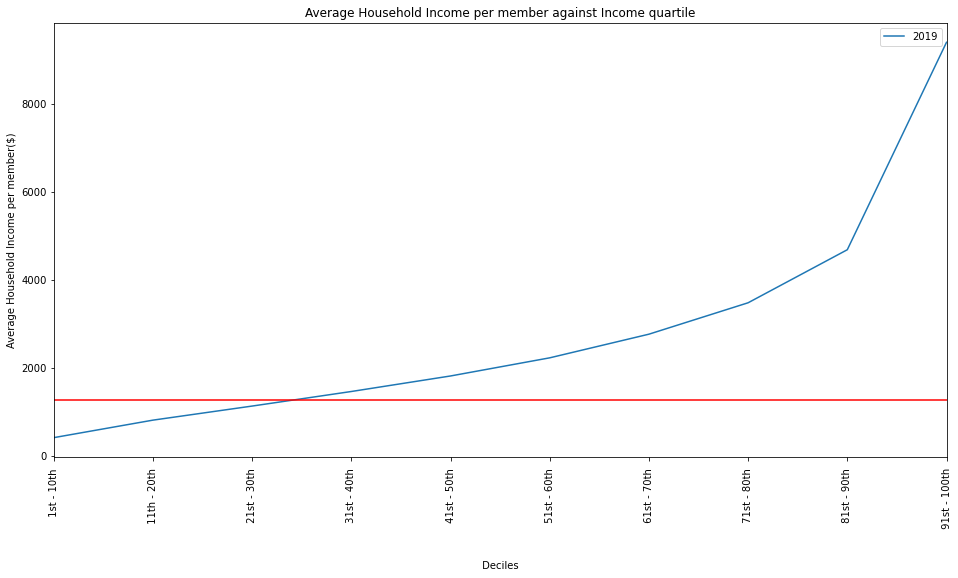

In [12]:
ax = MHI_per_member_decile_df[['2019']].plot(rot = 90, figsize = (16,8))
plt.axhline(y = 1263.60, color = 'r')
ax.set_title('Average Household Income per member against Income quartile')
ax.set_ylabel('Average Household Income per member($)')
plt.show()

Based on the graph above, the intersection point is almost ~33% percentile. What this means is that 33% of Singaporeans do not even make sufficient enough post CPF deductions to cover the minimal expenses in life. Singapore last had a recorded population of 5.639M as of 2018. 33% of that would be ~1.87M people 

However we would like a proper number to work with instead. To do this, we shall employ linear regression and use its predictive function to estimate the percentile @50% below median wage. We will have to convert the previous categorical data into numeric. We shall subsitute the income quartiles for a singular value, estimated to be the midpoint of the quartile itself. 

In [13]:
new_index = [percentile for percentile in range(5,101,10)]

In [14]:
#MHI_per_member_decile_df

In [15]:
MHI_per_member_decile_df.index = [new_index]
MHI_per_member_decile_df = MHI_per_member_decile_df.reset_index()

In [16]:
#MHI_per_member_decile_df 

In [17]:
#MHI_per_member_df['Resident Households']['Median'].loc['2019']

In [18]:
Poverty_percentile_est = []
for year in range(2000,2020):
    regr = linear_model.LinearRegression()
    y = MHI_per_member_decile_df[['level_0']]
    x = MHI_per_member_decile_df[[str(year)]]
    x_train, x_test, y_train, y_test = train_test_split(x , y , random_state = 0)
    regr.fit(x_train,y_train)
    median_wage = MHI_per_member_df['Resident Households']['Median'].loc[str(year)]
    relative_poverty_wage = int(median_wage)/2
    prediction = regr.predict([[relative_poverty_wage]])
    Poverty_percentile_est.append(prediction[0][0])

In [19]:
#Poverty_percentile_est

In [20]:
year_list = [year for year in range(2000,2020)]

In [21]:
poverty_percentile_yearly_df = pd.concat([pd.Series(year_list),pd.Series(Poverty_percentile_est)], axis = 1, keys = ['Year','Percentile']).set_index('Year')

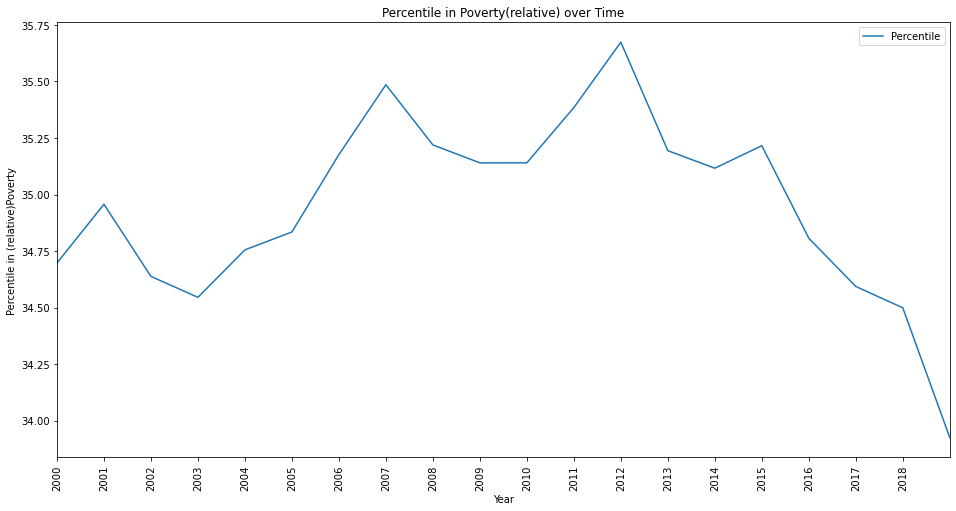

In [22]:
ax = poverty_percentile_yearly_df.plot(kind = 'line',xticks = np.arange(2000, 2019, 1), rot = 90, figsize=(16,8))
ax.set_title('Percentile in Poverty(relative) over Time')
ax.set_ylabel('Percentile in (relative)Poverty')
plt.show()

Based on the graph above, there is an overall downward trend in the poverty rate over the years. However to see that over 30% of individuals do not even earn enough to meet the average expenditure of the lowest income quartile is a concern. If we were to assume that the average expenditure of the lowest income quartile is the minimum expenditure for the possibility of social mobility, then 30% will be stuck in an endless poverty cycle. As a society we should explore more on what can be done for this group of individuals.

Data used:

https://www.singstat.gov.sg/

1) Average and Median Monthly Household Income from Work Per Household Member (Including Employer CPF Contributions) Among Resident and Resident Employed Households, 2000 - 2019 

2)Average Monthly Household Expenditure Per Household Member Among Resident Households by Type of Goods and Services (Broad) and Income Quintile

3) Average Monthly Household Income from Work Per Household Member (Including Employer CPF Contributions) Among Resident Employed Households by Deciles